In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
# Create Sudoku puzzle
puzzle = np.asarray(
    [
        [ 3, 0, 6, 5, 0, 8, 4, 0, 0 ],
        [ 5, 2, 0, 0, 0, 0, 0, 0, 0 ],
		[ 0, 0, 3, 0, 1, 0, 0, 8, 0 ],
        [ 0, 8, 7, 0, 0, 0, 0, 3, 1 ],
		[ 9, 0, 0, 8, 6, 3, 0, 0, 5 ],
		[ 0, 5, 0, 0, 9, 0, 6, 0, 0 ],
		[ 1, 3, 0, 0, 0, 0, 2, 5, 0 ],
        [ 0, 0, 0, 0, 0, 0, 0, 7, 4 ],
		[ 0, 0, 5, 2, 0, 6, 3, 0, 0 ],
    ]
)

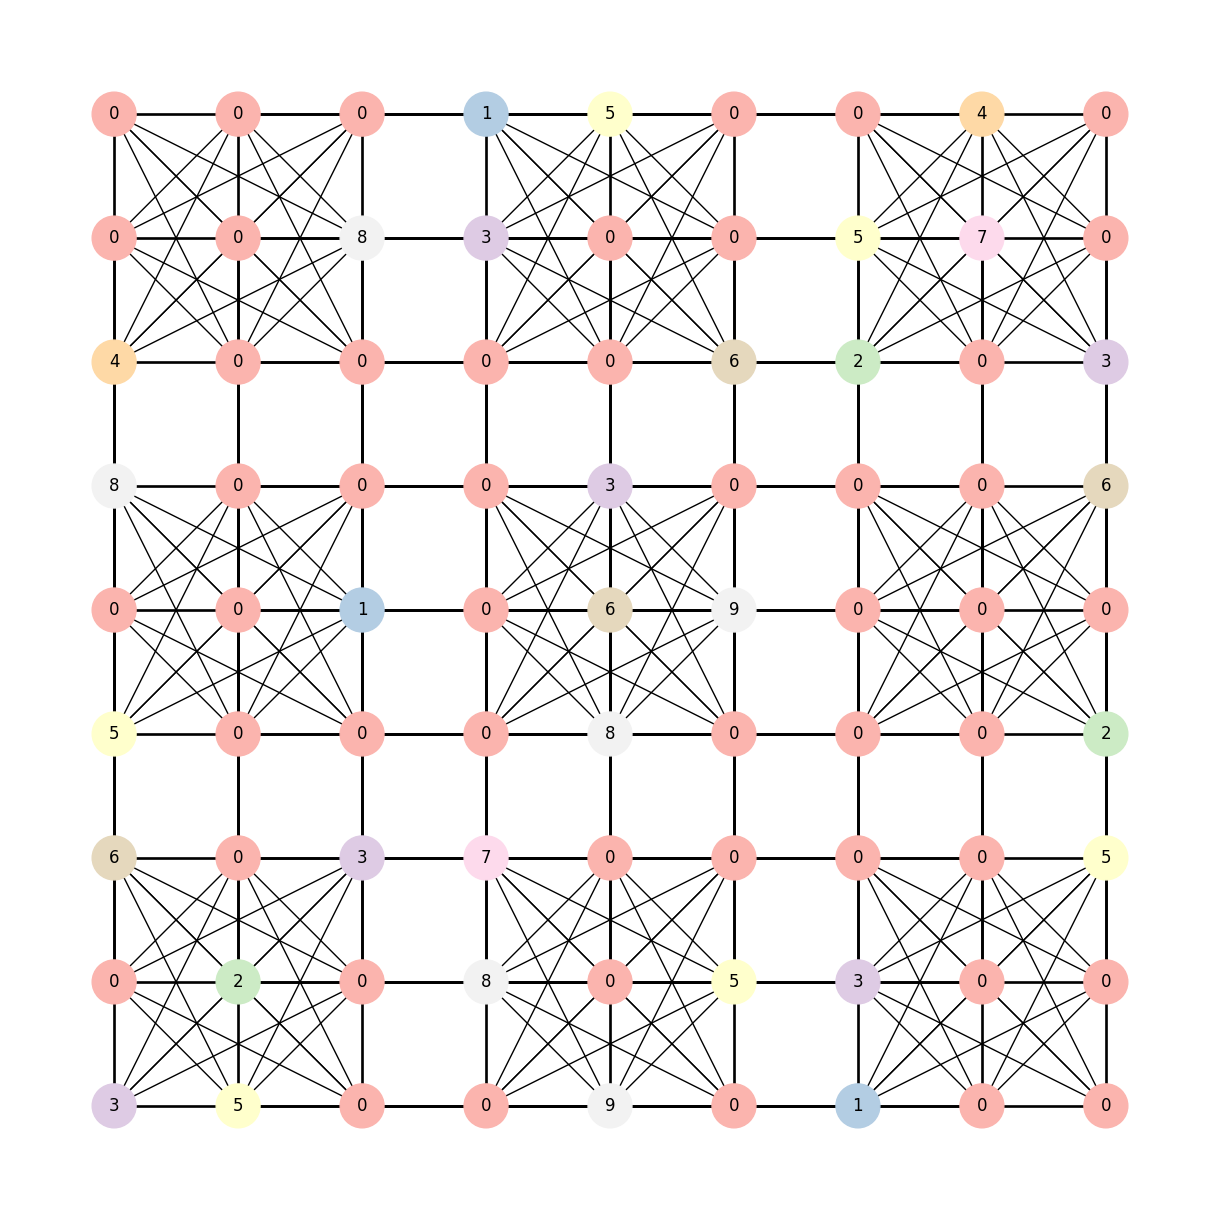

In [14]:
n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# we map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()

In [15]:
from random import sample


# Generate random sudoku
def generate_random_sudoku(n):
    side = n * n

    def _pattern(r, c):
        return (n * (r % n) + r // n + c) % side

    rBase = range(n)
    rows = [g * n + r for g in sample(rBase, n) for r in sample(rBase, n)]
    cols = [g * n + c for g in sample(rBase, n) for c in sample(rBase, n)]
    nums = sample(range(1, n * n + 1), n * n)
    board = [nums[_pattern(r, c)] for r in rows for c in cols]
    return board

In [16]:
board = generate_random_sudoku(n)
mapping = dict(zip(G.nodes(), board))

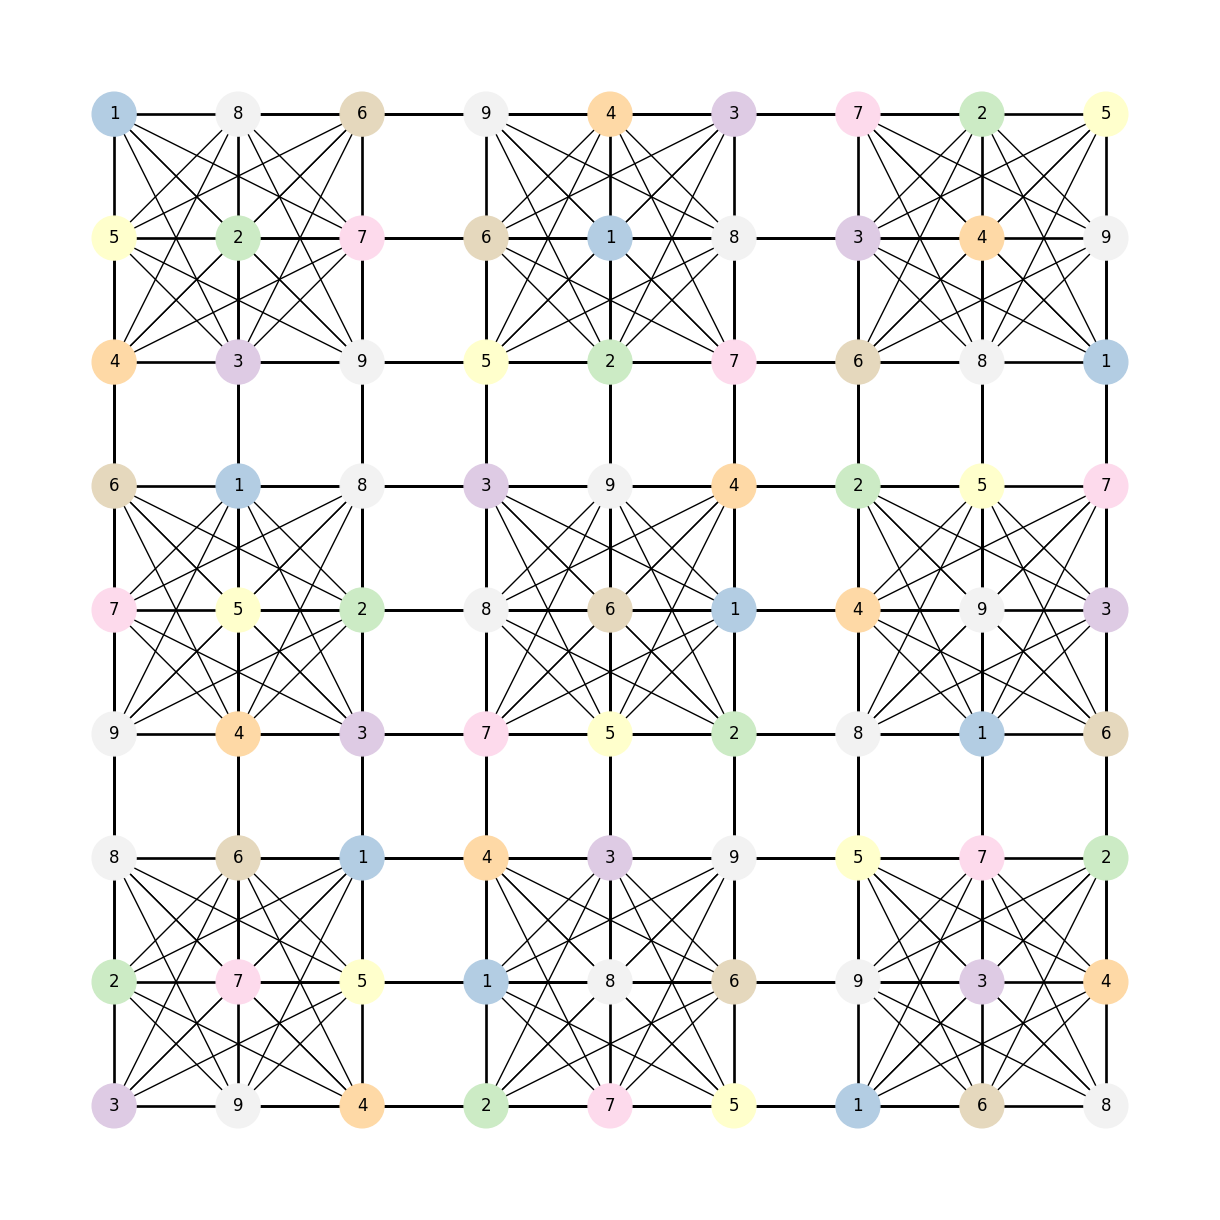

In [17]:
plt.figure(1, figsize=(12, 12))
nx.draw(
    G,
    pos=pos,
    labels=mapping,
    node_size=1000,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    with_labels=True,
)

plt.show()

In [18]:
G = nx.sudoku_graph(n=3)
len(G.edges())

810

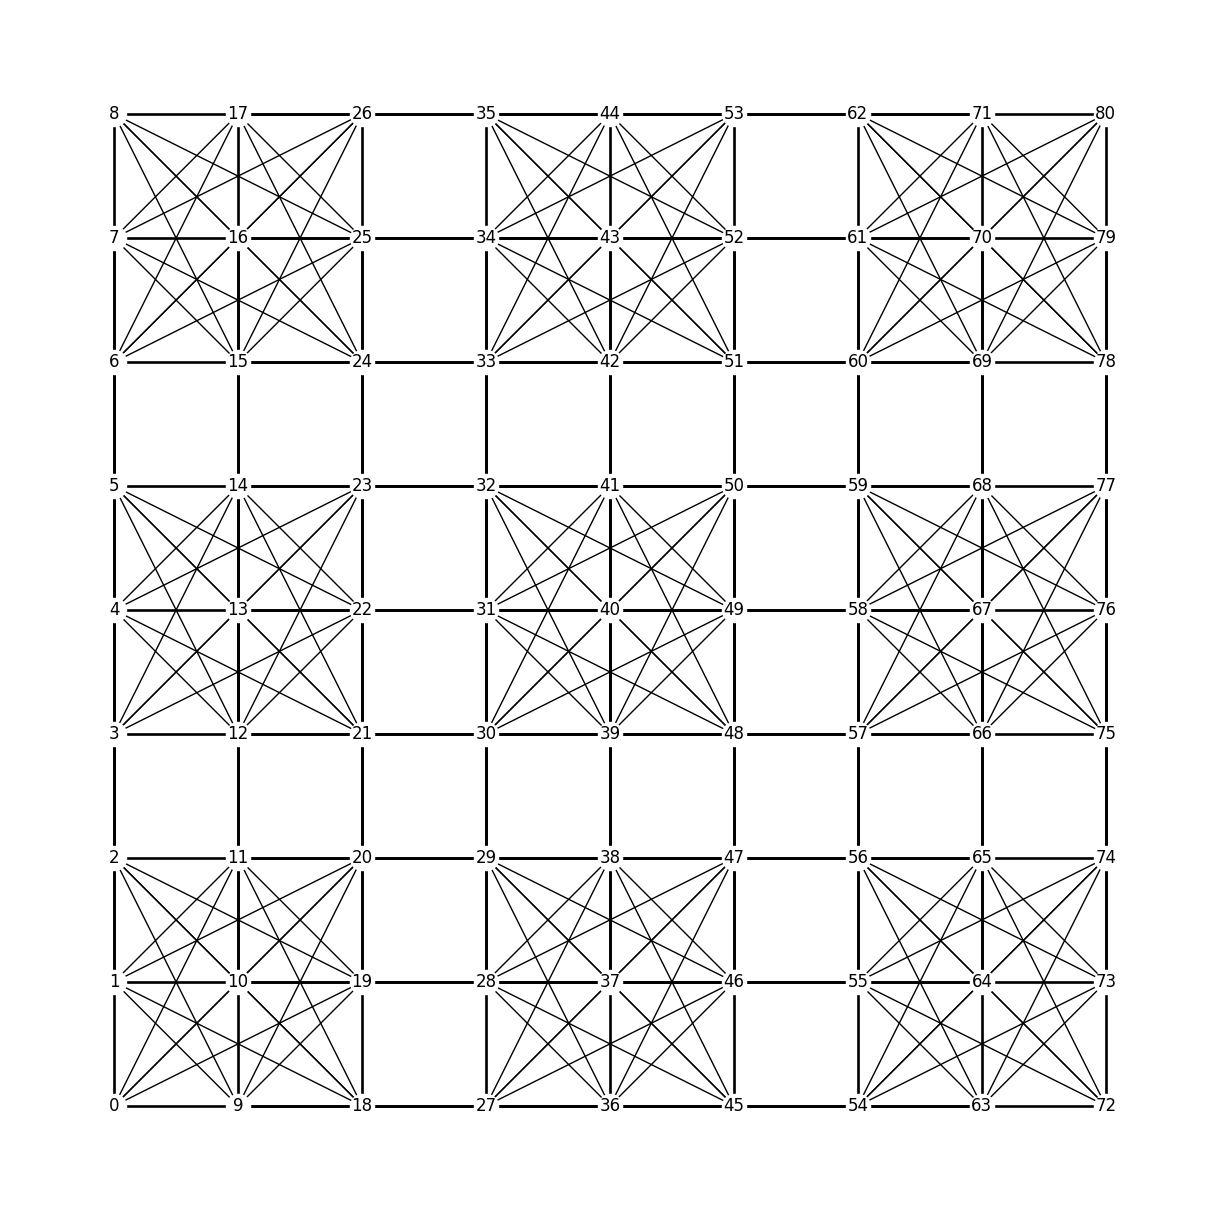

In [19]:
plt.figure(figsize=(12, 12))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))
nx.draw(G, pos=pos, node_color="white", with_labels=True)
plt.show()

In [20]:
import itertools


def separate_edges(n):
    G = nx.sudoku_graph(n)
    box_edges = []
    row_edges = []
    column_edges = []
    boxes = []
    for i in range(n):
        for j in range(n):
            box = [
                (n) * i + j * (n * n * n) + (n * n) * k + l
                for k in range(n)
                for l in range(n)
            ]
            boxes.append(box)

    for i in range(n * n):
        row_edges += list(
            itertools.combinations([i + (n * n) * j for j in range(n * n)], 2)
        )
        box_edges += list(itertools.combinations(boxes[i], 2))
        column_edges += list(
            itertools.combinations(list(G.nodes())[i * (n * n) : (i + 1) * (n * n)], 2)
        )
    return row_edges, box_edges, column_edges


def plot_edge_colored_sudoku(n=3, layout="grid"):
    row_edges, box_edges, column_edges = separate_edges(n)
    G = nx.sudoku_graph(n)
    board = generate_random_sudoku(n)
    mapping = dict(zip(G.nodes(), board))

    plt.figure(figsize=(12, 12))
    if layout == "circular":
        pos = nx.circular_layout(G)
    if layout == "grid":
        pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

    nx.draw(G, pos=pos, labels=mapping, with_labels=True, node_color="orange")
    nx.draw_networkx_edges(G, pos=pos, edgelist=box_edges, edge_color="tab:gray")
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=row_edges, width=2, edge_color="tab:blue"
    )
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=column_edges, width=2, edge_color="tab:green"
    )
    plt.show()

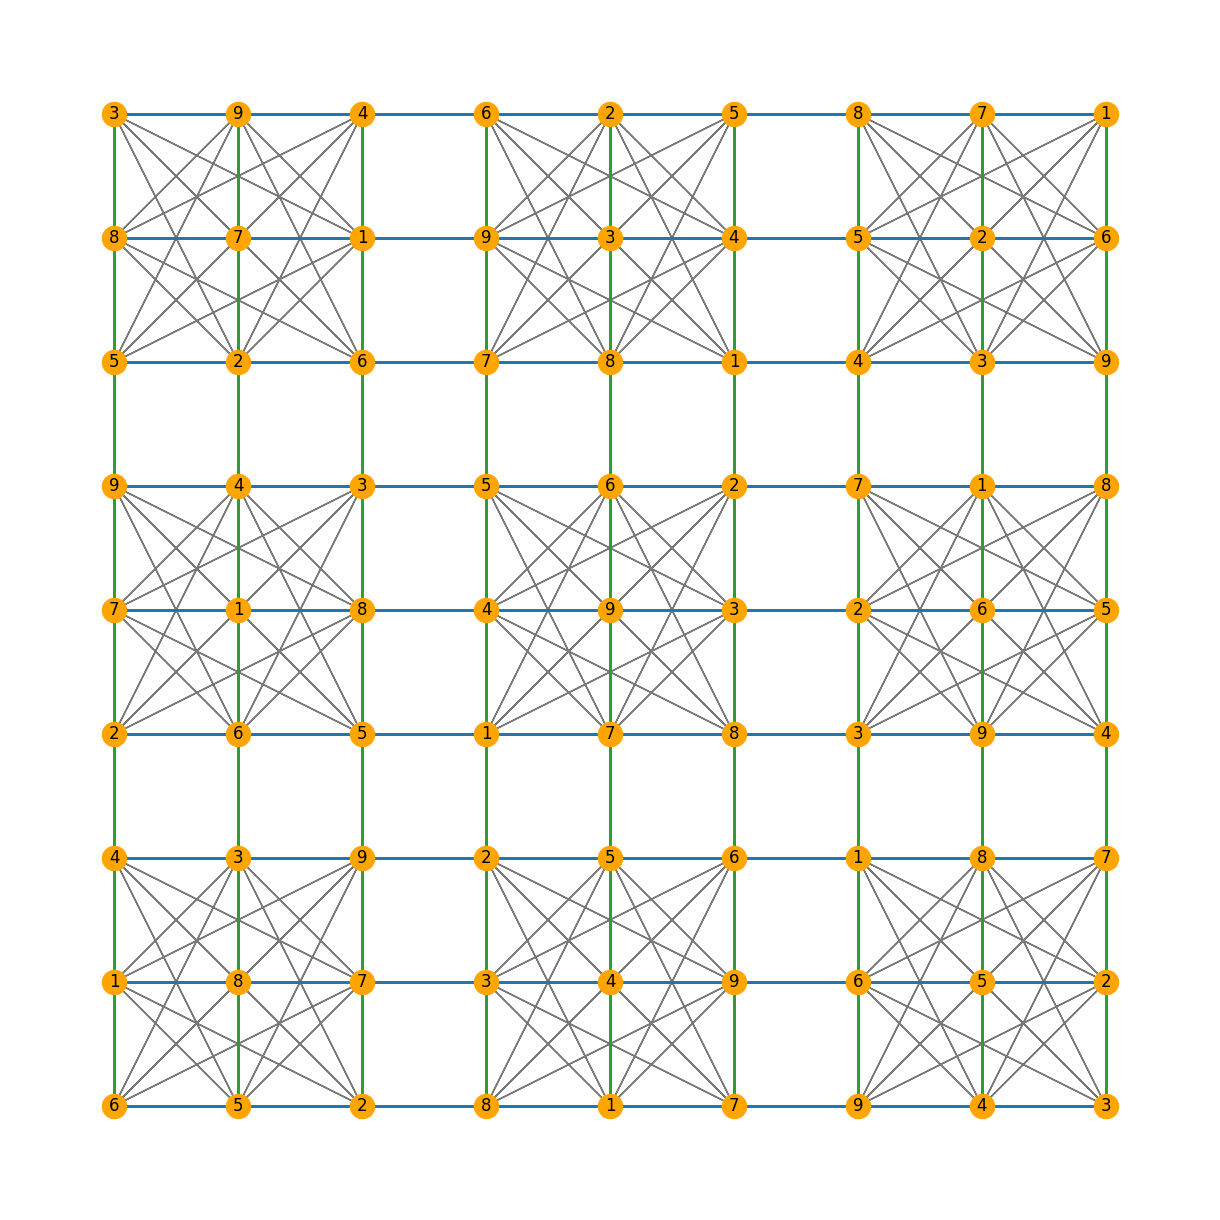

In [21]:
plot_edge_colored_sudoku()

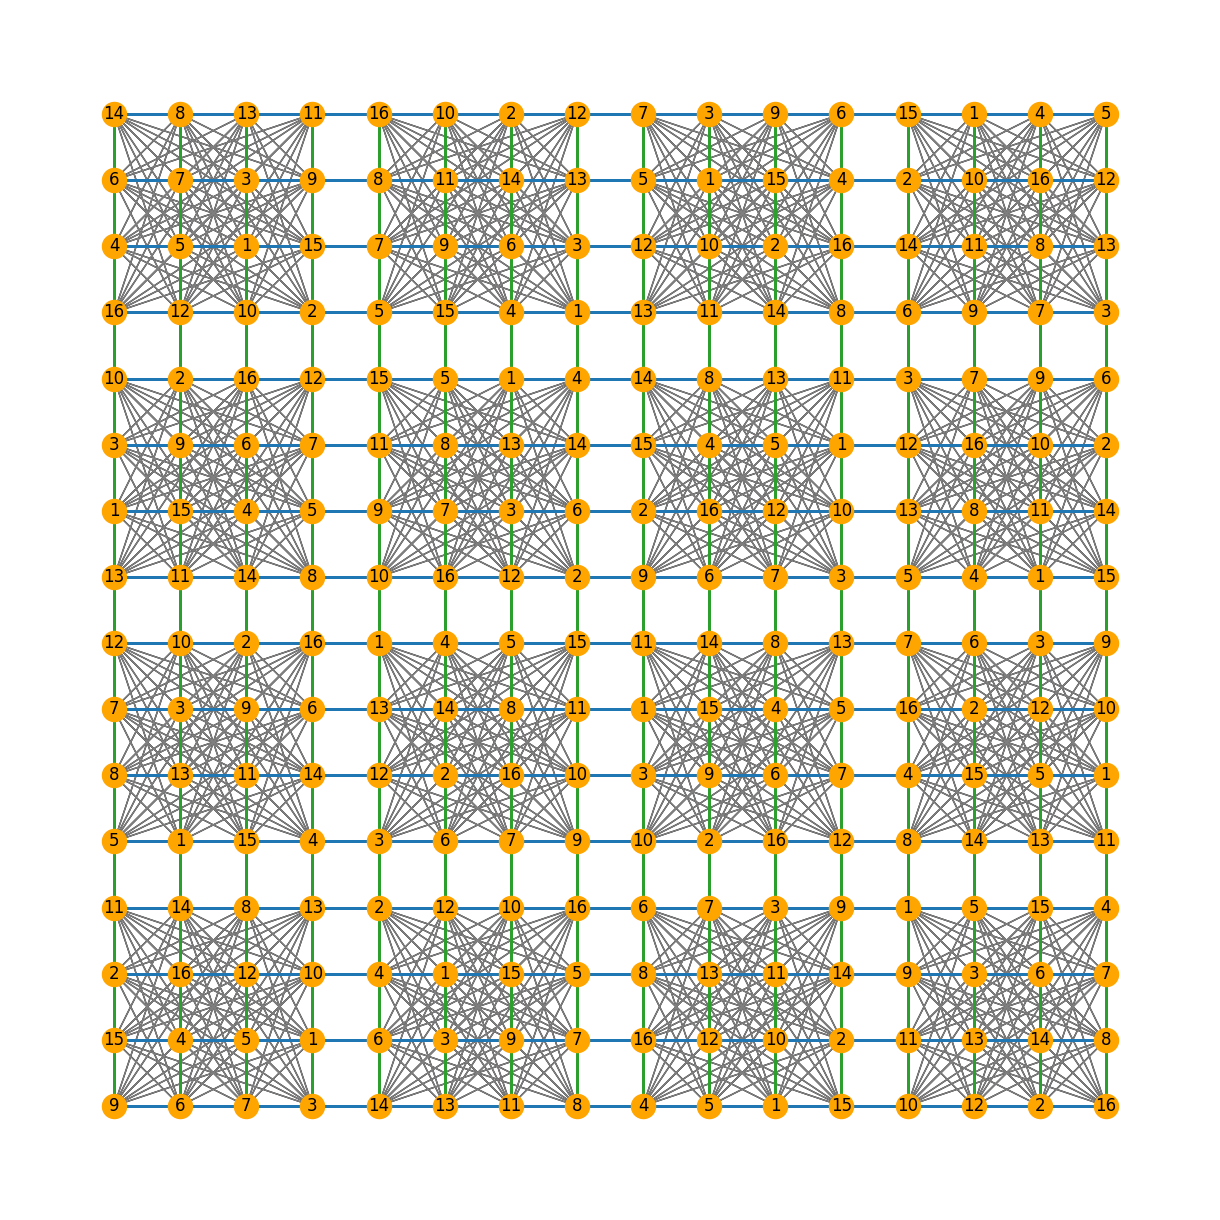

In [11]:
plot_edge_colored_sudoku(n=4)